In [30]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
from prophet.serialize import model_from_dict, model_to_dict
import numpy as np

In [44]:
# Load data
data = pd.read_csv('./data/Avocado_HassAvocadoBoard_20152023v1.0.1.csv', usecols=["Date", "TotalVolume"])
data = data.rename(columns={"Date": "ds", "TotalVolume": "y"}).sort_values(by="ds").reset_index(drop=True)
data = data.groupby("ds").sum().reset_index()
data
mean = data["y"].mean()
std = data["y"].std()
data["y"] = (data["y"] - mean) / std
# Split data into train and test sets
trainset = data[:int(len(data)*0.8)]
testset = data[int(len(data)*0.8):]
len(trainset), len(testset)

(372, 94)

<Axes: xlabel='ds'>

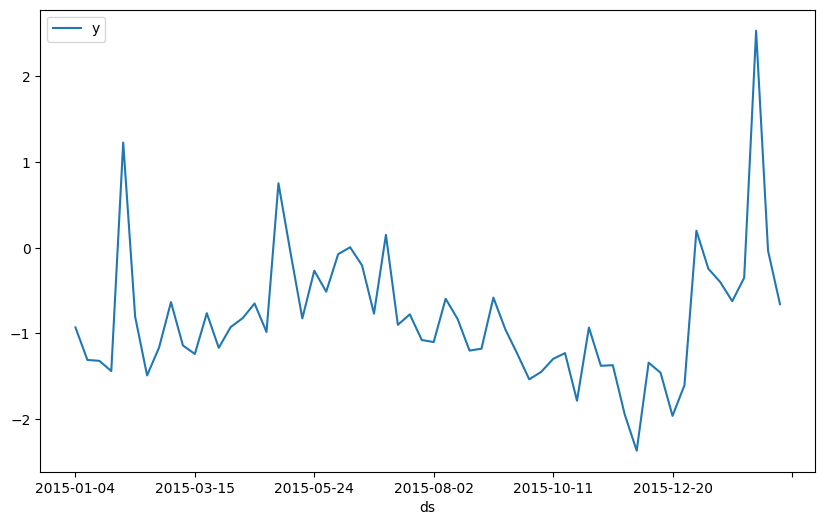

In [45]:
data[:60].plot(x="ds", y="y", figsize=(10, 6))

In [87]:


class RMSE:
    def __call__(self, y, y_hat):
        setattr(self, "out", round(np.sqrt(np.sum((y - y_hat) ** 2) / len(y)), 3), )

    def __repr__(self) -> str:
        return f"RMSE: {getattr(self, 'out')}"


# Create Prophet model
model = Prophet(
    # growth="logistic",
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_prior_scale=10,
    
)
model.add_country_holidays(country_name="US")

# Fit model
model.fit(trainset)

# Make future dataframe
# future = model.make_future_dataframe(periods=50)
future = data.iloc[:, :1]
# Make predictions
forecast = model.predict(future)
# print(forecast.info())

rmse = RMSE()

y1 = trainset["y"]
y1_hat = forecast["yhat"].head(len(trainset)).values
rmse(y1, y1_hat)
print(rmse)

y2 = testset["y"]
y2_hat = forecast["yhat"].tail(len(testset)).values
rmse(y2, y2_hat)
print(rmse)


# target =  testset["y"].values
# pred = forecast["yhat"].head()

# RMSE(y, y_hat)

# Plot predictions
# model.plot(forecast)

15:59:50 - cmdstanpy - INFO - Chain [1] start processing
15:59:50 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.663
RMSE: 0.958


d:\ENV\py310_torch222_cu121\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\ENV\py310_torch222_cu121\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


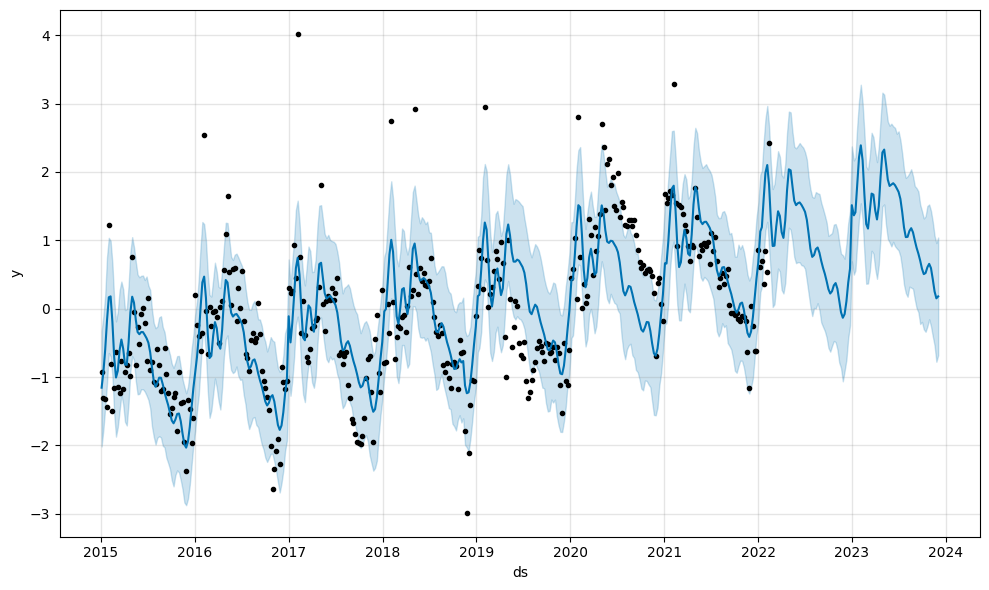

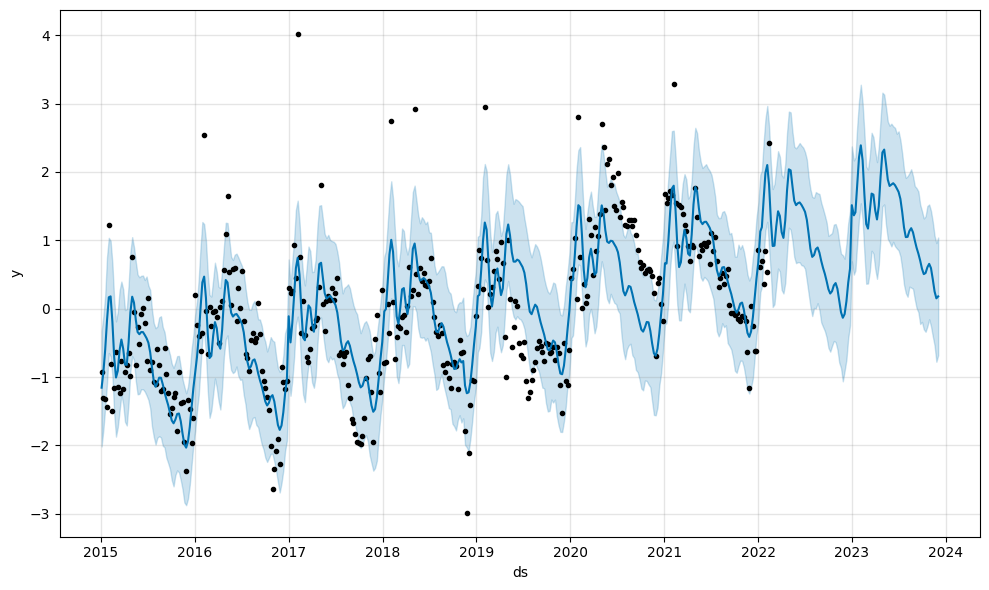

In [88]:
model.plot(forecast)

d:\ENV\py310_torch222_cu121\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\ENV\py310_torch222_cu121\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
d:\ENV\py310_torch222_cu121\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

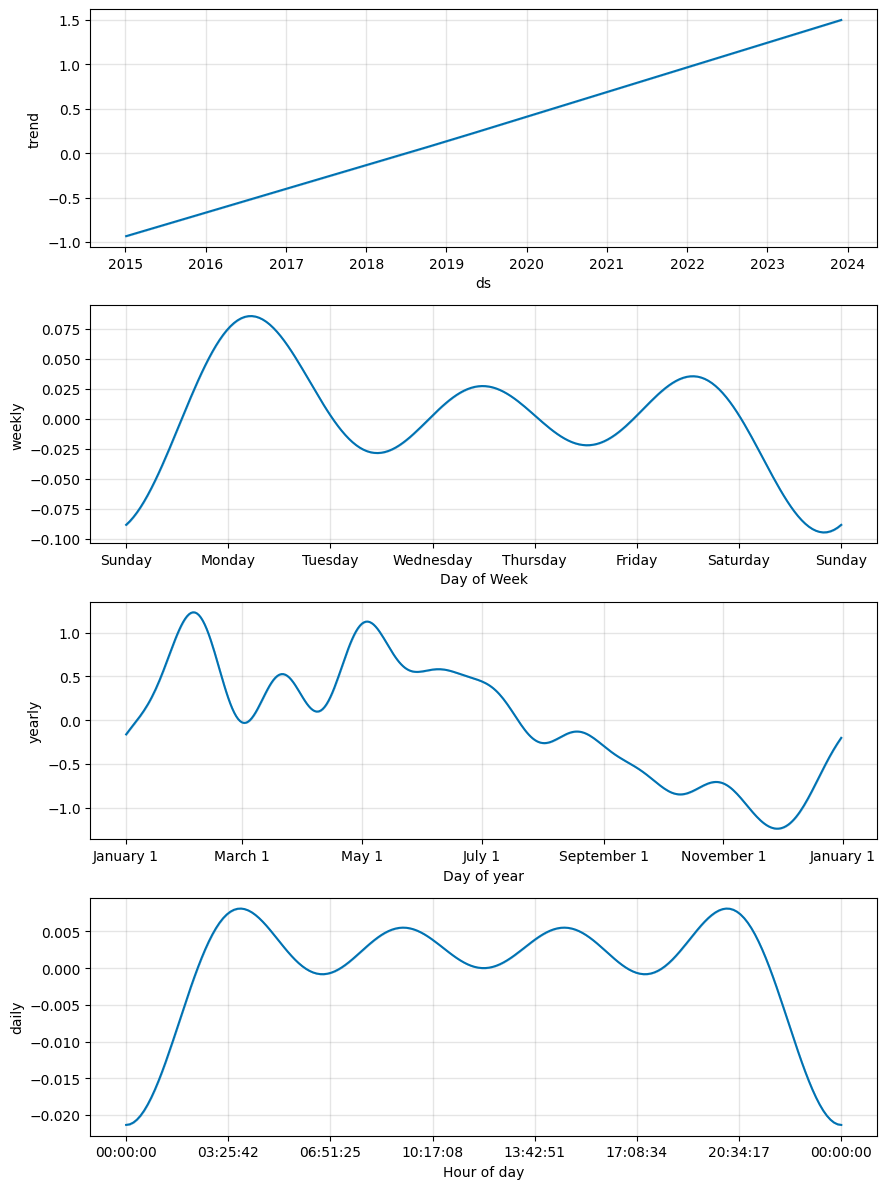

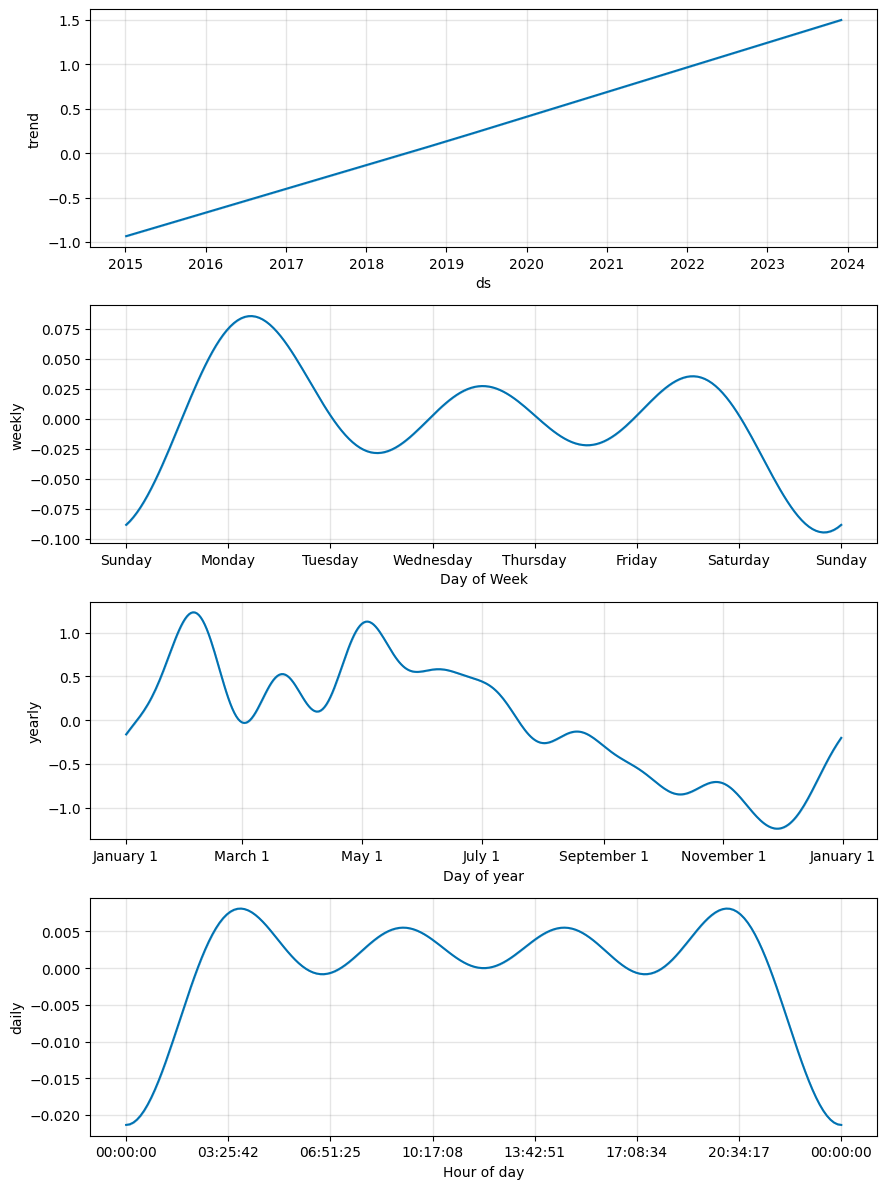

In [85]:
model.plot_components(forecast)

In [77]:
import json
model_weigth = model_to_dict(model)
print(json.dumps(model_weigth, indent=4))

{
    "growth": "linear",
    "n_changepoints": 25,
    "specified_changepoints": false,
    "changepoint_range": 0.8,
    "yearly_seasonality": true,
    "weekly_seasonality": true,
    "daily_seasonality": true,
    "seasonality_mode": "additive",
    "seasonality_prior_scale": 10.0,
    "changepoint_prior_scale": 0.05,
    "holidays_prior_scale": 10.0,
    "mcmc_samples": 0,
    "interval_width": 0.8,
    "uncertainty_samples": 1000,
    "y_scale": 164405012.56,
    "y_min": 0.0,
    "scaling": "absmax",
    "logistic_floor": false,
    "country_holidays": null,
    "component_modes": {
        "additive": [
            "yearly",
            "weekly",
            "daily",
            "additive_terms",
            "extra_regressors_additive",
            "holidays"
        ],
        "multiplicative": [
            "multiplicative_terms",
            "extra_regressors_multiplicative"
        ]
    },
    "holidays_mode": "additive",
    "changepoints": "{\"name\":\"ds\",\"index\":[12

In [97]:
model = model_from_dict(model_weigth)